In [1]:
# projet codedex, dataset sur les prix d'appartement a brooklyn's dumbo

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv('home_dataset.csv')

house_sizes = data['HouseSize'].values
house_prices = data['HousePrice'].values

print(data.head())

   HouseSize  HousePrice
0        793     1300000
1       2477     3700000
2       1263     1480000
3       1291     2380000
4        603      955000


<function matplotlib.pyplot.show(close=None, block=None)>

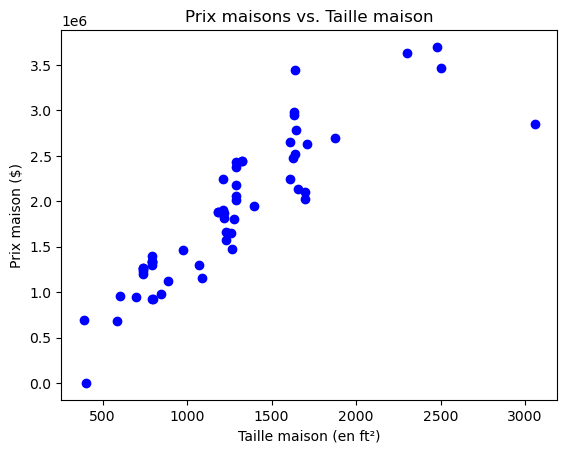

In [5]:
#visu mpl 
plt.scatter(house_sizes, house_prices, marker = 'o', color = 'blue')
plt.title('Prix maisons vs. Taille maison')
plt.xlabel('Taille maison (en ft²)')
plt.ylabel('Prix maison ($)')
plt.show

In [6]:
#il semble bien y avoir une relation linéaire entre nos deux paramètres
# On fait donc un modèle de regression linéaire

In [9]:
X_train, X_test, y_train, y_test = train_test_split(house_sizes, house_prices, test_size=0.2, random_state=42)
#creatio, model
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.7642029955599536

In [10]:
# C'est un score realiste pour ce genre de model
# on passe maintenant à la visu et predi

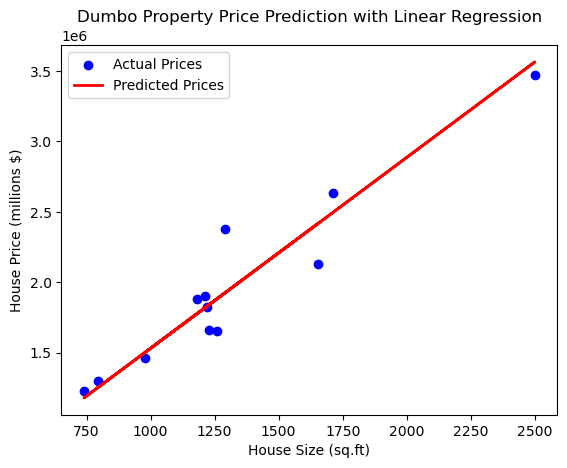

In [11]:
predictions = model.predict(X_test)

plt.scatter(X_test, y_test, marker='o', color='blue', label='Actual Prices')
plt.plot(X_test, predictions, color='red', linewidth=2, label='Predicted Prices')
plt.title('Dumbo Property Price Prediction with Linear Regression')
plt.xlabel('House Size (sq.ft)')
plt.ylabel('House Price (millions $)')
plt.legend()
plt.show()

In [ ]:
#fonction pour predire à partir d'un prix choisi
def predict_price(model, area):
    area = np.array([[area]])
    prediction = model.predict(area)
    return prediction[0]
price = predict_price(model, 600)
# mettre la surface ici  : ^^^^
print(f'Le prix de l\'appartement est de : {price:.2f} $')

Le prix de l'appartement est de : 987828.91 $
